## I  am using this notebook to analyze the Retraction Watch database. 
### I want to do three types of analyses: which country has the most retractions, what the reasons for the retractions were,
### and what study subjects had most retractions
## First, for every dataframe, I am going to filter the years to be between 2010 and 2025. 
## I am also going to use R cells to plot my graphs as I go along

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd

In [4]:
import requests

In [5]:
df = pd.read_csv("retraction_watch.csv", na_values=[''])
df

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,URLS,ArticleType,RetractionDate,RetractionDOI,RetractionPubMedID,OriginalPaperDate,OriginalPaperDOI,OriginalPaperPubMedID,RetractionNature,Reason,Paywalled,Notes
0,61101,IL2RB Is a Prognostic Biomarker Associated wit...,(BLS) Biochemistry;(BLS) Genetics;(HSC) Medici...,"The Second People's Hospital of Wuhu, Departme...",Journal of Oncology,Hindawi,China,Guangyao Li;Yandong Wang;Ya Cheng,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,11/01/23 0:00,10.1155/2023/9807856,37946722.0,4/29/2022 0:00,10.1155/2022/2043880,35528245.0,Retraction,+Concerns/Issues About Data;+Concerns/Issues A...,No,NaN
1,61099,In Vitro Activity of Various Sulbactam Compoun...,(BLS) Microbiology;(HSC) Medicine - Pharmacology;,"State Key Laboratory of Respiratory Disease, T...",Computational and Mathematical Methods in Medi...,Hindawi,China,Shunian Xiao;Chuyue Zhuo;Chao Zhuo,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,11/01/23 0:00,10.1155/2023/9839734,37946955.0,11/25/2021 0:00,10.1155/2021/1175379,34868336.0,Retraction,+Concerns/Issues About Data;+Concerns/Issues A...,No,NaN
2,61098,IIBE: An Improved Identity-Based Encryption Al...,(B/T) Computer Science;(PHY) Engineering - Ele...,"Software Engineering Institute of Guangzhou, G...",Security and Communication Networks,Hindawi,China;Philippines,Chunhua Cao;Yana Tang;Deyan Huang;Weimin Gan;C...,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,11/01/23 0:00,10.1155/2023/9754210,0.0,9/20/2021 0:00,10.1155/2021/8527068,0.0,Retraction,+Concerns/Issues About Data;+Concerns/Issues A...,No,See also: https://pubpeer.com/publications/288...
3,61096,Identification of Diabetic Retinopathy through...,(B/T) Data Science;(B/T) Technology;(HSC) Medi...,"Faculty of Computer Science and Informatics, A...",Mobile Information Systems,Hindawi,Jordan;Saudi Arabia,Malik Bader Alazzam;Fawaz Alassery;Ahmed Almulihi,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,11/01/23 0:00,10.1155/2023/9832745,0.0,11/26/2021 0:00,10.1155/2021/1155116,0.0,Retraction,+Concerns/Issues About Data;+Concerns/Issues A...,No,NaN
4,61095,Identification of Characteristic Genes in Whol...,(BLS) Genetics;,"Department of Orthopaedics, Yuncheng Central H...",Computational and Mathematical Methods in Medi...,Hindawi,China,Xiaobo Ma;Junqiang Su;Bo Wang;Xiasheng Jin,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,11/01/23 0:00,10.1155/2023/9837497,37946971.0,1/13/2022 0:00,10.1155/2022/6609901,35069789.0,Retraction,+Concerns/Issues About Data;+Concerns/Issues A...,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60575,5,Effect of Perindopril on Large Artery Stiffnes...,(BLS) Biochemistry;(HSC) Medicine - Cardiology...,"Alfred and Baker Medical Unit, Baker Heart Res...",JAMA: Journal of the American Medical Association,American Medical Association,Australia,Anna A Ahimastos;Anuradha Aggarwal;Kellie M D'...,http://retractionwatch.com/2015/11/23/jama-ret...,Clinical Study;Research Article;,12/22/2015 0:00,10.1001/jama.2015.16678,26594834.0,10/03/07 0:00,10.1001/jama.298.13.1539,1791149.0,Retraction,+Falsification/Fabrication of Data;+Investigat...,No,NaN
60576,4,MtvR is a global small noncoding regulatory RN...,(BLS) Biology - Cellular;(BLS) Genetics;(BLS) ...,Institute for Biotechnology and Bioengineering...,Journal of Bacteriology,American Society for Microbiology,Portugal,Christian G Ramos;André M Grilo;Paulo J P da C...,http://retractionwatch.com/2014/11/03/post-doc...,Research Article;,11/01/14 0:00,10.1128/JB.02299-14,25319527.0,5/31/2013 0:00,10.1128/JB.00242-13,2372964.0,Retraction,+Duplication of Image;+Manipulation of Images;,No,exact date of retraction unknown
60577,3,"The second RNA chaperone, Hfq2, is also requir...",(BLS) Biology - Cellular;(BLS) Genetics;(BLS) ...,IBB—Institute for Biotechnology and Bioenginee...,Journal of Bacteriology,A

### Extracting Year of retraction to make filtering and graphs easier

In [6]:
import re

In [7]:
df['RetractionYear'] = df['RetractionDate'].str.extract(r'(\d{4})')
df = df.dropna(subset=['RetractionYear'])  # Remove rows with NaN years
df['RetractionYear'] = df['RetractionYear'].astype(int)
df = df[(df['RetractionYear'] >= 2010) & (df['RetractionYear'] < 2025)] #setting the year range to be between 2010 and 2025
df

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,URLS,ArticleType,...,RetractionDOI,RetractionPubMedID,OriginalPaperDate,OriginalPaperDOI,OriginalPaperPubMedID,RetractionNature,Reason,Paywalled,Notes,RetractionYear
8,61082,Effectiveness of Ivermectin-Based Multidrug Th...,(HSC) Medicine - Infectious Disease;(HSC) Medi...,"ProgenaBiome, LLC, 1845 Knoll Dr., Ventura, CA...",Future Microbiology,Taylor and Francis,Australia;United States,Sabine Hazan;Sonya Dave;Anoja W Gunaratne;Siba...,https://retractionwatch.com/?s=sabine+hazan;ht...,Research Article;,...,10.2217/fmb-2022-0014c1,35695916.0,02/09/22 0:00,10.2217/fmb-2022-0014,35135310.0,Correction,+Error in Text;+Updated to Retraction;,No,NaN,2022
19,61056,Discovering Common Pathophysiological Processe...,(BLS) Anatomy/Physiology;(BLS) Genetics;(HSC) ...,"Department of Software Engineering, Daﬀodil In...",BioMed Research International,Hindawi,Australia;Bangladesh;Canada;India;Iraq;Saudi A...,Md Tanvir Hasan;Lway Faisal Abdulrazak;Mohamma...,https://retractionwatch.com/retracted-coronavi...,Research Article;,...,10.1155/2024/9789856,38550179.0,4/29/2022 0:00,10.1155/2022/8078259,35528173.0,Retraction,+Concerns/Issues About Data;+Concerns/Issues A...,No,NaN,2024
123,60927,Wireless Network Sensing of Urban Surface Wate...,(B/T) Computer Science;(B/T) Technology;(ENV) ...,School of Remote Sensing and Information Engin...,Wireless Communications and Mobile Computing,Hindawi,China,Qichao Zhao;Xiufeng Yang;Xuxin Dong;Huairui Li,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,...,10.1155/2023/9758314,0.0,12/06/21 0:00,10.1155/2021/2829195,0.0,Retraction,+Fake Peer Review;+Investigation by Journal/Pu...,No,NaN,2023
124,60926,Vibration Control of a Helicopter Rescue Simul...,(B/T) Technology;(B/T) Transportation;(PHY) En...,Naval Architecture and Ocean Engineering Colle...,Computational Intelligence and Neuroscience,Hindawi,China,Shengye Wang;Haitao Wang;Wei Xiong;Guangfeng Guan,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,...,10.1155/2023/9816384,38074369.0,4/25/2022 0:00,10.1155/2022/7173421,35510058.0,Retraction,+Fake Peer Review;+Investigation by Journal/Pu...,No,NaN,2023
125,60925,Vasoactive Drug Therapy and Clinical Nursing o...,(HSC) Medicine - Cardiovascular;(HSC) Medicine...,"Department of Cardiovascular Medicine, People’...",Contrast Media & Molecular Imaging,Hindawi,China,Menglin Li;Meixiang Xu;Minfang Feng;Lingyan Ren,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,...,10.1155/2023/9804951,38075712.0,9/21/2022 0:00,10.1155/2022/5659513,36213559.0,Retraction,+Fake Peer Review;+Investigation by Journal/Pu...,No,NaN,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60570,10,Early years of biological agents therapy in Cr...,(HSC) Medicine - Gastroenterology;,"Department of Public Health Sciences, ‘‘Sapien...",Journal of Cellular Physiology,Wiley,Italy;United States,Anna Bellizzi;Valentina Barucca;Daniela Fiorit...,http://retractionwatch.com/2014/05/01/plagiari...,Review Article;,...,10.1002/jcp.24594,24756581.0,4/16/2010 0:00,10.1002/jcp.22146,20432445.0,Retraction,+Investigation by Journal/Publisher;+Plagiaris...,Yes,NaN,2014
60571,9,Sphingosine kinase 1 regulates pro-inflammator...,(BLS) Biochemistry;(BLS) Biology - Cellular;(B...,"Department of Physiology, Yong Loo Lin School ...",Journal of Cellular Physiology,Wiley,Singapore,Liang Zhi;Bernard P Leung;Alirio J Melendez,http://retractionwatch.com/2012/04/04/third-re...,Research Article;,...,10.1002/jcp.24007,22536599.0,3/30/2006 0:00,10.1002/jcp.20646,16575915.0,Retraction,+Duplication of Image;+Investigation by Compan...,No,NaN,2012
60575,5,Effect of Perindopril on Large Artery Stiffnes...,(BLS) Biochemistry;(HSC) Medicine - Cardiology...,"Alfred and Baker Medical Unit, Baker Heart Res...",JAMA: Journal of the American Medical Association,American Medical Association,Australia,Anna A Ahimastos;Anuradha 

### Separating each country's retraction in a different row

In [8]:
df = df.assign(country=df['Country'].str.split(';')).explode('country', ignore_index=True)
df 

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,URLS,ArticleType,...,RetractionPubMedID,OriginalPaperDate,OriginalPaperDOI,OriginalPaperPubMedID,RetractionNature,Reason,Paywalled,Notes,RetractionYear,country
0,61082,Effectiveness of Ivermectin-Based Multidrug Th...,(HSC) Medicine - Infectious Disease;(HSC) Medi...,"ProgenaBiome, LLC, 1845 Knoll Dr., Ventura, CA...",Future Microbiology,Taylor and Francis,Australia;United States,Sabine Hazan;Sonya Dave;Anoja W Gunaratne;Siba...,https://retractionwatch.com/?s=sabine+hazan;ht...,Research Article;,...,35695916.0,02/09/22 0:00,10.2217/fmb-2022-0014,35135310.0,Correction,+Error in Text;+Updated to Retraction;,No,NaN,2022,Australia
1,61082,Effectiveness of Ivermectin-Based Multidrug Th...,(HSC) Medicine - Infectious Disease;(HSC) Medi...,"ProgenaBiome, LLC, 1845 Knoll Dr., Ventura, CA...",Future Microbiology,Taylor and Francis,Australia;United States,Sabine Hazan;Sonya Dave;Anoja W Gunaratne;Siba...,https://retractionwatch.com/?s=sabine+hazan;ht...,Research Article;,...,35695916.0,02/09/22 0:00,10.2217/fmb-2022-0014,35135310.0,Correction,+Error in Text;+Updated to Retraction;,No,NaN,2022,United States
2,61056,Discovering Common Pathophysiological Processe...,(BLS) Anatomy/Physiology;(BLS) Genetics;(HSC) ...,"Department of Software Engineering, Daﬀodil In...",BioMed Research International,Hindawi,Australia;Bangladesh;Canada;India;Iraq;Saudi A...,Md Tanvir Hasan;Lway Faisal Abdulrazak;Mohamma...,https://retractionwatch.com/retracted-coronavi...,Research Article;,...,38550179.0,4/29/2022 0:00,10.1155/2022/8078259,35528173.0,Retraction,+Concerns/Issues About Data;+Concerns/Issues A...,No,NaN,2024,Australia
3,61056,Discovering Common Pathophysiological Processe...,(BLS) Anatomy/Physiology;(BLS) Genetics;(HSC) ...,"Department of Software Engineering, Daﬀodil In...",BioMed Research International,Hindawi,Australia;Bangladesh;Canada;India;Iraq;Saudi A...,Md Tanvir Hasan;Lway Faisal Abdulrazak;Mohamma...,https://retractionwatch.com/retracted-coronavi...,Research Article;,...,38550179.0,4/29/2022 0:00,10.1155/2022/8078259,35528173.0,Retraction,+Concerns/Issues About Data;+Concerns/Issues A...,No,NaN,2024,Bangladesh
4,61056,Discovering Common Pathophysiological Processe...,(BLS) Anatomy/Physiology;(BLS) Genetics;(HSC) ...,"Department of Software Engineering, Daﬀodil In...",BioMed Research International,Hindawi,Australia;Bangladesh;Canada;India;Iraq;Saudi A...,Md Tanvir Hasan;Lway Faisal Abdulrazak;Mohamma...,https://retractionwatch.com/retracted-coronavi...,Research Article;,...,38550179.0,4/29/2022 0:00,10.1155/2022/8078259,35528173.0,Retraction,+Concerns/Issues About Data;+Concerns/Issues A...,No,NaN,2024,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41238,10,Early years of biological agents therapy in Cr...,(HSC) Medicine - Gastroenterology;,"Department of Public Health Sciences, ‘‘Sapien...",Journal of Cellular Physiology,Wiley,Italy;United States,Anna Bellizzi;Valentina Barucca;Daniela Fiorit...,http://retractionwatch.com/2014/05/01/plagiari...,Review Article;,...,24756581.0,4/16/2010 0:00,10.1002/jcp.22146,20432445.0,Retraction,+Investigation by Journal/Publisher;+Plagiaris...,Yes,NaN,2014,United States
41239,9,Sphingosine kinase 1 regulates pro-inflammator...,(BLS) Biochemistry;(BLS) Biology - Cellular;(B...,"Department of Physiology, Yong Loo Lin School ...",Journal of Cellular Physiology,Wiley,Singapore,Liang Zhi;Bernard P Leung;Alirio J Melendez,http://retractionwatch.com/2012/04/04/third-re...,Research Article;,...,22536599.0,3/30/2006 0:00,10.1002/jcp.20646,16575915.0,Retraction,+Duplication of Image;+Investigation by Compan...,No,NaN,2012,Singapore
41240,5,Effect of Perindopril on Large Artery Stiffnes...,(BLS) Biochemistry;(HSC) Medicine - Cardiology...,"Alfred and Baker Medical Unit, Baker Heart Res...",JAMA: Journal of the American Medical Association,American Medical Association,Australia,Anna A Ahimastos;Anur

In [9]:
countries_df = df.groupby(['RetractionYear', 'country']).size().reset_index(name='count')
countries_df = countries_df.pivot(index='RetractionYear', columns='country', values='count').fillna(0) #making it a long df to plot in R

countries_df

country,Afghanistan,Albania,Algeria,Angola,Anguilla,Argentina,Armenia,Aruba,Australia,Austria,...,United Kingdom,United States,Unknown,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
RetractionYear,,,,,,,,,,,,,,,,,,,,,
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,3.0,...,42.0,64.0,7.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2011,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,21.0,3.0,...,58.0,85.0,22.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2012,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0,0.0,...,36.0,101.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,15.0,1.0,...,48.0,119.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,14.0,0.0,...,35.0,134.0,5.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
2015,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,22.0,1.0,...,59.0,214.0,21.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2016,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,21.0,5.0,...,59.0,230.0,18.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2017,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,27.0,2.0,...,47.0,193.0,24.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0
2018,0.0,0.0,6.0,0.0,0.0,5.0,0.0,0.0,18.0,2.0,...,82.0,261.0,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [10]:

country_totals = countries_df.sum()

top_10_countries = country_totals.sort_values(ascending=False).head(10) #taking first 10 countries


top_10_df = top_10_countries.to_frame(name='Total Retractions')

total_row = pd.DataFrame(top_10_df.sum()).T
total_row.index = ['Total']


final_df = pd.concat([top_10_df, total_row])
final_df

,Total Retractions
China,20054.0
United States,3142.0
India,2573.0
Russia,1548.0
United Kingdom,947.0
Saudi Arabia,931.0
Iran,805.0
Japan,767.0
South Korea,678.0
Germany,585.0


In [50]:
final_df.to_csv("final_country_retraction.csv")

### Graphs

In [11]:
%%R
library(ggplot2)
library(tidyr)
library(ggthemes) #for the economist's theme


In [12]:
%%R
df <- read.csv('final_country_retraction.csv')
colnames(df)[1] <- "Country"

df_long <- df %>%
  pivot_longer(cols = -Country, names_to = "Metric", values_to = "Retractions")

df_long

# A tibble: 10 × 3
   Country        Metric            Retractions
   <chr>          <chr>                   <int>
 1 China          Total.Retractions       20433
 2 United States  Total.Retractions        4998
 3 India          Total.Retractions        3561
 4 United Kingdom Total.Retractions        1941
 5 Saudi Arabia   Total.Retractions        1910
 6 Russia         Total.Retractions        1721
 7 Pakistan       Total.Retractions        1276
 8 Germany        Total.Retractions        1270
 9 Iran           Total.Retractions        1058
10 Japan          Total.Retractions        1020


In [13]:
%%R
library(stringr) #i honestly don't remember what this is for but i'll keep it here so I don't break the code. yes it's too late to look this up



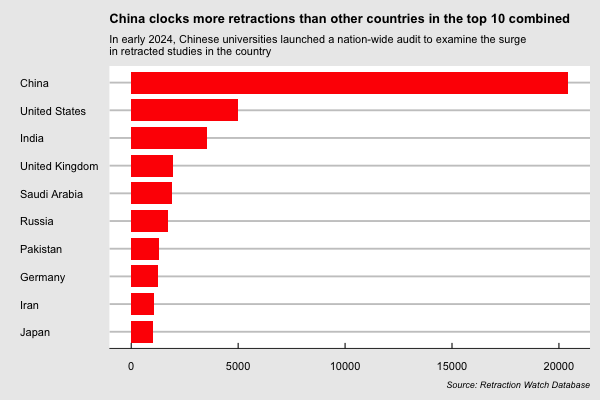

In [14]:
%%R -w 600 -h 400
df_long$Country <- as.character(df_long$Country)


ggplot(df_long, aes(x = reorder(Country, Retractions), y = Retractions)) +
  geom_bar(stat = 'identity', width = 0.8, fill = 'red') +
  coord_flip() +
  labs(x = "", 
       y = "", 
       title = "China clocks more retractions than other countries in the top 10 combined",
      subtitle = 'In early 2024, Chinese universities launched a nation-wide audit to examine the surge \nin retracted studies in the country', 
      caption = 'Source: Retraction Watch Database') +
  theme_economist_white() +
  theme(
    plot.title = element_text(size = 13, face = "bold", hjust = 0, 
                              margin = margin(b = 10)), 
    plot.subtitle = element_text(size = 11, hjust = 0, margin = margin(b = 10)),
    plot.caption = element_text(size = 9, hjust = 1, face = "italic") 
  )

In [23]:
df_new = pd.read_csv("retraction_watch.csv", na_values=[""])
df_new

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,URLS,ArticleType,RetractionDate,RetractionDOI,RetractionPubMedID,OriginalPaperDate,OriginalPaperDOI,OriginalPaperPubMedID,RetractionNature,Reason,Paywalled,Notes
0,61101,IL2RB Is a Prognostic Biomarker Associated wit...,(BLS) Biochemistry;(BLS) Genetics;(HSC) Medici...,"The Second People's Hospital of Wuhu, Departme...",Journal of Oncology,Hindawi,China,Guangyao Li;Yandong Wang;Ya Cheng,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,11/01/23 0:00,10.1155/2023/9807856,37946722.0,4/29/2022 0:00,10.1155/2022/2043880,35528245.0,Retraction,+Concerns/Issues About Data;+Concerns/Issues A...,No,NaN
1,61099,In Vitro Activity of Various Sulbactam Compoun...,(BLS) Microbiology;(HSC) Medicine - Pharmacology;,"State Key Laboratory of Respiratory Disease, T...",Computational and Mathematical Methods in Medi...,Hindawi,China,Shunian Xiao;Chuyue Zhuo;Chao Zhuo,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,11/01/23 0:00,10.1155/2023/9839734,37946955.0,11/25/2021 0:00,10.1155/2021/1175379,34868336.0,Retraction,+Concerns/Issues About Data;+Concerns/Issues A...,No,NaN
2,61098,IIBE: An Improved Identity-Based Encryption Al...,(B/T) Computer Science;(PHY) Engineering - Ele...,"Software Engineering Institute of Guangzhou, G...",Security and Communication Networks,Hindawi,China;Philippines,Chunhua Cao;Yana Tang;Deyan Huang;Weimin Gan;C...,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,11/01/23 0:00,10.1155/2023/9754210,0.0,9/20/2021 0:00,10.1155/2021/8527068,0.0,Retraction,+Concerns/Issues About Data;+Concerns/Issues A...,No,See also: https://pubpeer.com/publications/288...
3,61096,Identification of Diabetic Retinopathy through...,(B/T) Data Science;(B/T) Technology;(HSC) Medi...,"Faculty of Computer Science and Informatics, A...",Mobile Information Systems,Hindawi,Jordan;Saudi Arabia,Malik Bader Alazzam;Fawaz Alassery;Ahmed Almulihi,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,11/01/23 0:00,10.1155/2023/9832745,0.0,11/26/2021 0:00,10.1155/2021/1155116,0.0,Retraction,+Concerns/Issues About Data;+Concerns/Issues A...,No,NaN
4,61095,Identification of Characteristic Genes in Whol...,(BLS) Genetics;,"Department of Orthopaedics, Yuncheng Central H...",Computational and Mathematical Methods in Medi...,Hindawi,China,Xiaobo Ma;Junqiang Su;Bo Wang;Xiasheng Jin,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,11/01/23 0:00,10.1155/2023/9837497,37946971.0,1/13/2022 0:00,10.1155/2022/6609901,35069789.0,Retraction,+Concerns/Issues About Data;+Concerns/Issues A...,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60575,5,Effect of Perindopril on Large Artery Stiffnes...,(BLS) Biochemistry;(HSC) Medicine - Cardiology...,"Alfred and Baker Medical Unit, Baker Heart Res...",JAMA: Journal of the American Medical Association,American Medical Association,Australia,Anna A Ahimastos;Anuradha Aggarwal;Kellie M D'...,http://retractionwatch.com/2015/11/23/jama-ret...,Clinical Study;Research Article;,12/22/2015 0:00,10.1001/jama.2015.16678,26594834.0,10/03/07 0:00,10.1001/jama.298.13.1539,1791149.0,Retraction,+Falsification/Fabrication of Data;+Investigat...,No,NaN
60576,4,MtvR is a global small noncoding regulatory RN...,(BLS) Biology - Cellular;(BLS) Genetics;(BLS) ...,Institute for Biotechnology and Bioengineering...,Journal of Bacteriology,American Society for Microbiology,Portugal,Christian G Ramos;André M Grilo;Paulo J P da C...,http://retractionwatch.com/2014/11/03/post-doc...,Research Article;,11/01/14 0:00,10.1128/JB.02299-14,25319527.0,5/31/2013 0:00,10.1128/JB.00242-13,2372964.0,Retraction,+Duplication of Image;+Manipulation of Images;,No,exact date of retraction unknown
60577,3,"The second RNA chaperone, Hfq2, is also requir...",(BLS) Biology - Cellular;(BLS) Genetics;(BLS) ...,IBB—Institute for Biotechnology and Bioenginee...,Journal of Bacteriology,A

In [24]:
df_new['RetractionYear'] = df_new['RetractionDate'].str.extract(r'(\d{4})')
df_new = df_new.dropna(subset=['RetractionYear'])
df_new['RetractionYear'] = df_new['RetractionYear'].astype(int)
df_new = df_new[(df_new['RetractionYear'] >= 2010) & (df_new['RetractionYear'] < 2025)]
df_new

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,URLS,ArticleType,...,RetractionDOI,RetractionPubMedID,OriginalPaperDate,OriginalPaperDOI,OriginalPaperPubMedID,RetractionNature,Reason,Paywalled,Notes,RetractionYear
8,61082,Effectiveness of Ivermectin-Based Multidrug Th...,(HSC) Medicine - Infectious Disease;(HSC) Medi...,"ProgenaBiome, LLC, 1845 Knoll Dr., Ventura, CA...",Future Microbiology,Taylor and Francis,Australia;United States,Sabine Hazan;Sonya Dave;Anoja W Gunaratne;Siba...,https://retractionwatch.com/?s=sabine+hazan;ht...,Research Article;,...,10.2217/fmb-2022-0014c1,35695916.0,02/09/22 0:00,10.2217/fmb-2022-0014,35135310.0,Correction,+Error in Text;+Updated to Retraction;,No,NaN,2022
19,61056,Discovering Common Pathophysiological Processe...,(BLS) Anatomy/Physiology;(BLS) Genetics;(HSC) ...,"Department of Software Engineering, Daﬀodil In...",BioMed Research International,Hindawi,Australia;Bangladesh;Canada;India;Iraq;Saudi A...,Md Tanvir Hasan;Lway Faisal Abdulrazak;Mohamma...,https://retractionwatch.com/retracted-coronavi...,Research Article;,...,10.1155/2024/9789856,38550179.0,4/29/2022 0:00,10.1155/2022/8078259,35528173.0,Retraction,+Concerns/Issues About Data;+Concerns/Issues A...,No,NaN,2024
123,60927,Wireless Network Sensing of Urban Surface Wate...,(B/T) Computer Science;(B/T) Technology;(ENV) ...,School of Remote Sensing and Information Engin...,Wireless Communications and Mobile Computing,Hindawi,China,Qichao Zhao;Xiufeng Yang;Xuxin Dong;Huairui Li,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,...,10.1155/2023/9758314,0.0,12/06/21 0:00,10.1155/2021/2829195,0.0,Retraction,+Fake Peer Review;+Investigation by Journal/Pu...,No,NaN,2023
124,60926,Vibration Control of a Helicopter Rescue Simul...,(B/T) Technology;(B/T) Transportation;(PHY) En...,Naval Architecture and Ocean Engineering Colle...,Computational Intelligence and Neuroscience,Hindawi,China,Shengye Wang;Haitao Wang;Wei Xiong;Guangfeng Guan,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,...,10.1155/2023/9816384,38074369.0,4/25/2022 0:00,10.1155/2022/7173421,35510058.0,Retraction,+Fake Peer Review;+Investigation by Journal/Pu...,No,NaN,2023
125,60925,Vasoactive Drug Therapy and Clinical Nursing o...,(HSC) Medicine - Cardiovascular;(HSC) Medicine...,"Department of Cardiovascular Medicine, People’...",Contrast Media & Molecular Imaging,Hindawi,China,Menglin Li;Meixiang Xu;Minfang Feng;Lingyan Ren,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,...,10.1155/2023/9804951,38075712.0,9/21/2022 0:00,10.1155/2022/5659513,36213559.0,Retraction,+Fake Peer Review;+Investigation by Journal/Pu...,No,NaN,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60570,10,Early years of biological agents therapy in Cr...,(HSC) Medicine - Gastroenterology;,"Department of Public Health Sciences, ‘‘Sapien...",Journal of Cellular Physiology,Wiley,Italy;United States,Anna Bellizzi;Valentina Barucca;Daniela Fiorit...,http://retractionwatch.com/2014/05/01/plagiari...,Review Article;,...,10.1002/jcp.24594,24756581.0,4/16/2010 0:00,10.1002/jcp.22146,20432445.0,Retraction,+Investigation by Journal/Publisher;+Plagiaris...,Yes,NaN,2014
60571,9,Sphingosine kinase 1 regulates pro-inflammator...,(BLS) Biochemistry;(BLS) Biology - Cellular;(B...,"Department of Physiology, Yong Loo Lin School ...",Journal of Cellular Physiology,Wiley,Singapore,Liang Zhi;Bernard P Leung;Alirio J Melendez,http://retractionwatch.com/2012/04/04/third-re...,Research Article;,...,10.1002/jcp.24007,22536599.0,3/30/2006 0:00,10.1002/jcp.20646,16575915.0,Retraction,+Duplication of Image;+Investigation by Compan...,No,NaN,2012
60575,5,Effect of Perindopril on Large Artery Stiffnes...,(BLS) Biochemistry;(HSC) Medicine - Cardiology...,"Alfred and Baker Medical Unit, Baker Heart Res...",JAMA: Journal of the American Medical Association,American Medical Association,Australia,Anna A Ahimastos;Anuradha 

### Now for reasons, doing the same thing as countries, separating each reason and then making it a distinct row

In [25]:
df_new['Reason'] = df_new['Reason'].str.split('+')
df_new = df.explode('Reason').reset_index(drop=True)
df_new

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,URLS,ArticleType,...,RetractionPubMedID,OriginalPaperDate,OriginalPaperDOI,OriginalPaperPubMedID,RetractionNature,Reason,Paywalled,Notes,RetractionYear,country
0,61082,Effectiveness of Ivermectin-Based Multidrug Th...,(HSC) Medicine - Infectious Disease;(HSC) Medi...,"ProgenaBiome, LLC, 1845 Knoll Dr., Ventura, CA...",Future Microbiology,Taylor and Francis,Australia;United States,Sabine Hazan;Sonya Dave;Anoja W Gunaratne;Siba...,https://retractionwatch.com/?s=sabine+hazan;ht...,Research Article;,...,35695916.0,02/09/22 0:00,10.2217/fmb-2022-0014,35135310.0,Correction,+Error in Text;+Updated to Retraction;,No,NaN,2022,Australia
1,61082,Effectiveness of Ivermectin-Based Multidrug Th...,(HSC) Medicine - Infectious Disease;(HSC) Medi...,"ProgenaBiome, LLC, 1845 Knoll Dr., Ventura, CA...",Future Microbiology,Taylor and Francis,Australia;United States,Sabine Hazan;Sonya Dave;Anoja W Gunaratne;Siba...,https://retractionwatch.com/?s=sabine+hazan;ht...,Research Article;,...,35695916.0,02/09/22 0:00,10.2217/fmb-2022-0014,35135310.0,Correction,+Error in Text;+Updated to Retraction;,No,NaN,2022,United States
2,61056,Discovering Common Pathophysiological Processe...,(BLS) Anatomy/Physiology;(BLS) Genetics;(HSC) ...,"Department of Software Engineering, Daﬀodil In...",BioMed Research International,Hindawi,Australia;Bangladesh;Canada;India;Iraq;Saudi A...,Md Tanvir Hasan;Lway Faisal Abdulrazak;Mohamma...,https://retractionwatch.com/retracted-coronavi...,Research Article;,...,38550179.0,4/29/2022 0:00,10.1155/2022/8078259,35528173.0,Retraction,+Concerns/Issues About Data;+Concerns/Issues A...,No,NaN,2024,Australia
3,61056,Discovering Common Pathophysiological Processe...,(BLS) Anatomy/Physiology;(BLS) Genetics;(HSC) ...,"Department of Software Engineering, Daﬀodil In...",BioMed Research International,Hindawi,Australia;Bangladesh;Canada;India;Iraq;Saudi A...,Md Tanvir Hasan;Lway Faisal Abdulrazak;Mohamma...,https://retractionwatch.com/retracted-coronavi...,Research Article;,...,38550179.0,4/29/2022 0:00,10.1155/2022/8078259,35528173.0,Retraction,+Concerns/Issues About Data;+Concerns/Issues A...,No,NaN,2024,Bangladesh
4,61056,Discovering Common Pathophysiological Processe...,(BLS) Anatomy/Physiology;(BLS) Genetics;(HSC) ...,"Department of Software Engineering, Daﬀodil In...",BioMed Research International,Hindawi,Australia;Bangladesh;Canada;India;Iraq;Saudi A...,Md Tanvir Hasan;Lway Faisal Abdulrazak;Mohamma...,https://retractionwatch.com/retracted-coronavi...,Research Article;,...,38550179.0,4/29/2022 0:00,10.1155/2022/8078259,35528173.0,Retraction,+Concerns/Issues About Data;+Concerns/Issues A...,No,NaN,2024,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41238,10,Early years of biological agents therapy in Cr...,(HSC) Medicine - Gastroenterology;,"Department of Public Health Sciences, ‘‘Sapien...",Journal of Cellular Physiology,Wiley,Italy;United States,Anna Bellizzi;Valentina Barucca;Daniela Fiorit...,http://retractionwatch.com/2014/05/01/plagiari...,Review Article;,...,24756581.0,4/16/2010 0:00,10.1002/jcp.22146,20432445.0,Retraction,+Investigation by Journal/Publisher;+Plagiaris...,Yes,NaN,2014,United States
41239,9,Sphingosine kinase 1 regulates pro-inflammator...,(BLS) Biochemistry;(BLS) Biology - Cellular;(B...,"Department of Physiology, Yong Loo Lin School ...",Journal of Cellular Physiology,Wiley,Singapore,Liang Zhi;Bernard P Leung;Alirio J Melendez,http://retractionwatch.com/2012/04/04/third-re...,Research Article;,...,22536599.0,3/30/2006 0:00,10.1002/jcp.20646,16575915.0,Retraction,+Duplication of Image;+Investigation by Compan...,No,NaN,2012,Singapore
41240,5,Effect of Perindopril on Large Artery Stiffnes...,(BLS) Biochemistry;(HSC) Medicine - Cardiology...,"Alfred and Baker Medical Unit, Baker Heart Res...",JAMA: Journal of the American Medical Association,American Medical Association,Australia,Anna A Ahimastos;Anur

In [26]:
df_new = df_new.groupby('RetractionYear')['Reason'].value_counts()

In [27]:
df_new.to_csv("retraction-reasons.csv")

In [28]:
df_new = pd.read_csv("retraction-reasons.csv")
df_new

,RetractionYear,Reason,count
0,2010,+Notice - Limited or No Information;,1210
1,2010,+Breach of Policy by Author;+Investigation by ...,418
2,2010,+Breach of Policy by Author;+Date of Retractio...,329
3,2010,+Notice - Limited or No Information;+Removed;,250
4,2010,+Investigation by Journal/Publisher;+Notice - ...,149
...,...,...,...
8333,2024,+Manipulation of Images;+Unreliable Data;,1
8334,2024,+Notice - Unable to Access via current resources;,1
8335,2024,+Notice - Unable to Access via current resourc...,1
8336,2024,+Results Not Reproducible;+Unreliable Results;,1


### This part took a lot of methodological decisions. There were a lot of reasons so I had to make groups of them. For example, all reasons like fraud/fabrication came together. All errors (whether images, data collection, analysis) were grouped together and so on

In [29]:
def categorize_reason(reason):
    if pd.isna(reason):
        return 'Unknown'
    reason = reason.lower()
    if 'plagiarism' in reason:
        return 'Plagiarism'
    elif 'misconduct' in reason or 'breach of policy' in reason:
        return 'Misconduct/Breach of Policy'
    elif 'error' in reason:
        return 'Errors in Data/Image/Analysis'
    elif 'fabrication' in reason or 'falsification' in reason:
        return 'Falsification/Fabrication'
    elif 'paper mill' in reason:
        return 'Paper Mill'
    elif 'fake peer review' in reason:
        return 'Fake Peer Review'
    elif 'investigation' in reason:
        return 'Investigation by Journal/Third Party'
    else: 
        return 'Other'

In [30]:
df_new['GroupedReason'] = df_new['Reason'].apply(categorize_reason)

In [31]:
df_grouped_by_year = df_new.groupby(['RetractionYear', 'GroupedReason'], as_index=False)['count'].sum()
df_reason = df_grouped_by_year
df_reason.to_csv("reason-wise-retraction.csv")

In [32]:
%%R

df <- read.csv("reason-wise-retraction.csv")

In [33]:
%%R

library(dplyr)

filtered_data <- df %>%
  filter(GroupedReason %in% c("Plagiarism", "Misconduct", "Data/Analysis Error", "Fake Peer Review", "Falsification/Fabrication",
    "Misconduct/Breach of Policy", "Paper Mill"))


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [105]:
%%R

library(showtext)
font_add_google("Lato", "lato")
showtext_auto()

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In plot_theme(plot) :
R[write to console]: 
 
R[write to console]:  The `lengend.direction` theme element is not defined in the element hierarchy.



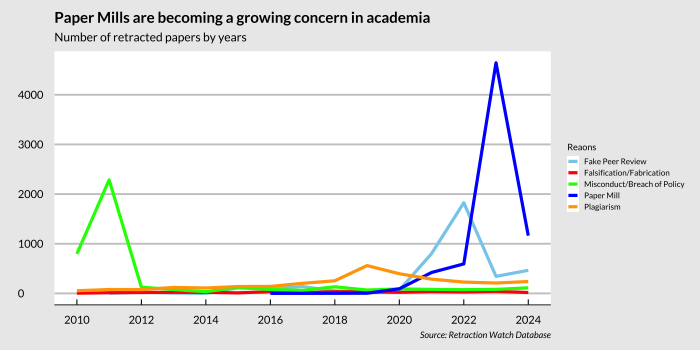

In [106]:
%%R -w700 -h350

ggplot(filtered_data) + 
    aes(x=RetractionYear, y=count, color = GroupedReason, group = GroupedReason) + 
    geom_line(size=1.5) +
    scale_x_continuous(breaks = seq(2010, 2025, by=2)) +
    labs(title='Paper Mills are becoming a growing concern in academia', subtitle='Number of retracted papers by years', 
         x='', y='', caption = 'Source: Retraction Watch Database') +
    scale_color_manual(name = "Reaons", values = c("skyblue", "red", "green", "blue", "orange")) +
    theme_economist_white() +
    theme(
    text = element_text(family = "lato"),
    plot.title = element_text(size = 15, face = "bold", hjust = 0, margin = margin(b=10)), 
    plot.subtitle = element_text(size = 12, hjust = 0, margin = margin(b=10)),
    legend.position = "right",
    lengend.direction = "vertical",
    legend.key.size = unit(0.4, "cm"),  # Reduce legend key size
    legend.text = element_text(size = 8),  # Reduce legend text size
    legend.title = element_text(size = 9),
    plot.caption = element_text(size = 9, hjust = 1, face = "italic")
  )

In [85]:
df = pd.read_csv("retraction_watch.csv")
df

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,URLS,ArticleType,RetractionDate,RetractionDOI,RetractionPubMedID,OriginalPaperDate,OriginalPaperDOI,OriginalPaperPubMedID,RetractionNature,Reason,Paywalled,Notes
0,61101,IL2RB Is a Prognostic Biomarker Associated wit...,(BLS) Biochemistry;(BLS) Genetics;(HSC) Medici...,"The Second People's Hospital of Wuhu, Departme...",Journal of Oncology,Hindawi,China,Guangyao Li;Yandong Wang;Ya Cheng,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,11/01/23 0:00,10.1155/2023/9807856,37946722.0,4/29/2022 0:00,10.1155/2022/2043880,35528245.0,Retraction,+Concerns/Issues About Data;+Concerns/Issues A...,No,NaN
1,61099,In Vitro Activity of Various Sulbactam Compoun...,(BLS) Microbiology;(HSC) Medicine - Pharmacology;,"State Key Laboratory of Respiratory Disease, T...",Computational and Mathematical Methods in Medi...,Hindawi,China,Shunian Xiao;Chuyue Zhuo;Chao Zhuo,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,11/01/23 0:00,10.1155/2023/9839734,37946955.0,11/25/2021 0:00,10.1155/2021/1175379,34868336.0,Retraction,+Concerns/Issues About Data;+Concerns/Issues A...,No,NaN
2,61098,IIBE: An Improved Identity-Based Encryption Al...,(B/T) Computer Science;(PHY) Engineering - Ele...,"Software Engineering Institute of Guangzhou, G...",Security and Communication Networks,Hindawi,China;Philippines,Chunhua Cao;Yana Tang;Deyan Huang;Weimin Gan;C...,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,11/01/23 0:00,10.1155/2023/9754210,0.0,9/20/2021 0:00,10.1155/2021/8527068,0.0,Retraction,+Concerns/Issues About Data;+Concerns/Issues A...,No,See also: https://pubpeer.com/publications/288...
3,61096,Identification of Diabetic Retinopathy through...,(B/T) Data Science;(B/T) Technology;(HSC) Medi...,"Faculty of Computer Science and Informatics, A...",Mobile Information Systems,Hindawi,Jordan;Saudi Arabia,Malik Bader Alazzam;Fawaz Alassery;Ahmed Almulihi,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,11/01/23 0:00,10.1155/2023/9832745,0.0,11/26/2021 0:00,10.1155/2021/1155116,0.0,Retraction,+Concerns/Issues About Data;+Concerns/Issues A...,No,NaN
4,61095,Identification of Characteristic Genes in Whol...,(BLS) Genetics;,"Department of Orthopaedics, Yuncheng Central H...",Computational and Mathematical Methods in Medi...,Hindawi,China,Xiaobo Ma;Junqiang Su;Bo Wang;Xiasheng Jin,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,11/01/23 0:00,10.1155/2023/9837497,37946971.0,1/13/2022 0:00,10.1155/2022/6609901,35069789.0,Retraction,+Concerns/Issues About Data;+Concerns/Issues A...,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60575,5,Effect of Perindopril on Large Artery Stiffnes...,(BLS) Biochemistry;(HSC) Medicine - Cardiology...,"Alfred and Baker Medical Unit, Baker Heart Res...",JAMA: Journal of the American Medical Association,American Medical Association,Australia,Anna A Ahimastos;Anuradha Aggarwal;Kellie M D'...,http://retractionwatch.com/2015/11/23/jama-ret...,Clinical Study;Research Article;,12/22/2015 0:00,10.1001/jama.2015.16678,26594834.0,10/03/07 0:00,10.1001/jama.298.13.1539,1791149.0,Retraction,+Falsification/Fabrication of Data;+Investigat...,No,NaN
60576,4,MtvR is a global small noncoding regulatory RN...,(BLS) Biology - Cellular;(BLS) Genetics;(BLS) ...,Institute for Biotechnology and Bioengineering...,Journal of Bacteriology,American Society for Microbiology,Portugal,Christian G Ramos;André M Grilo;Paulo J P da C...,http://retractionwatch.com/2014/11/03/post-doc...,Research Article;,11/01/14 0:00,10.1128/JB.02299-14,25319527.0,5/31/2013 0:00,10.1128/JB.00242-13,2372964.0,Retraction,+Duplication of Image;+Manipulation of Images;,No,exact date of retraction unknown
60577,3,"The second RNA chaperone, Hfq2, is also requir...",(BLS) Biology - Cellular;(BLS) Genetics;(BLS) ...,IBB—Institute for Biotechnology and Bioenginee...,Journal of Bacteriology,A

In [86]:
df['RetractionYear'] = df['RetractionDate'].str.extract(r'(\d{4})')
df = df.dropna(subset=['RetractionYear'])
df['RetractionYear'] = df['RetractionYear'].astype(int)
df = df[(df['RetractionYear'] >= 2010) & (df['RetractionYear'] < 2024)]
df

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,URLS,ArticleType,...,RetractionDOI,RetractionPubMedID,OriginalPaperDate,OriginalPaperDOI,OriginalPaperPubMedID,RetractionNature,Reason,Paywalled,Notes,RetractionYear
8,61082,Effectiveness of Ivermectin-Based Multidrug Th...,(HSC) Medicine - Infectious Disease;(HSC) Medi...,"ProgenaBiome, LLC, 1845 Knoll Dr., Ventura, CA...",Future Microbiology,Taylor and Francis,Australia;United States,Sabine Hazan;Sonya Dave;Anoja W Gunaratne;Siba...,https://retractionwatch.com/?s=sabine+hazan;ht...,Research Article;,...,10.2217/fmb-2022-0014c1,35695916.0,02/09/22 0:00,10.2217/fmb-2022-0014,35135310.0,Correction,+Error in Text;+Updated to Retraction;,No,NaN,2022
123,60927,Wireless Network Sensing of Urban Surface Wate...,(B/T) Computer Science;(B/T) Technology;(ENV) ...,School of Remote Sensing and Information Engin...,Wireless Communications and Mobile Computing,Hindawi,China,Qichao Zhao;Xiufeng Yang;Xuxin Dong;Huairui Li,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,...,10.1155/2023/9758314,0.0,12/06/21 0:00,10.1155/2021/2829195,0.0,Retraction,+Fake Peer Review;+Investigation by Journal/Pu...,No,NaN,2023
124,60926,Vibration Control of a Helicopter Rescue Simul...,(B/T) Technology;(B/T) Transportation;(PHY) En...,Naval Architecture and Ocean Engineering Colle...,Computational Intelligence and Neuroscience,Hindawi,China,Shengye Wang;Haitao Wang;Wei Xiong;Guangfeng Guan,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,...,10.1155/2023/9816384,38074369.0,4/25/2022 0:00,10.1155/2022/7173421,35510058.0,Retraction,+Fake Peer Review;+Investigation by Journal/Pu...,No,NaN,2023
125,60925,Vasoactive Drug Therapy and Clinical Nursing o...,(HSC) Medicine - Cardiovascular;(HSC) Medicine...,"Department of Cardiovascular Medicine, People’...",Contrast Media & Molecular Imaging,Hindawi,China,Menglin Li;Meixiang Xu;Minfang Feng;Lingyan Ren,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,...,10.1155/2023/9804951,38075712.0,9/21/2022 0:00,10.1155/2022/5659513,36213559.0,Retraction,+Fake Peer Review;+Investigation by Journal/Pu...,No,NaN,2023
126,60924,Value of Transabdominal Combined Transvaginal ...,(HSC) Medicine - Obstetrics/Gynecology;(HSC) R...,"Department of Sonography, Jinan People’s Hospi...",BioMed Research International,Hindawi,China,Hongmei Qi;Changjiang Zhou;Zhenyi Huang;Na Yan...,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,...,10.1155/2023/9876769,38075366.0,07/07/22 0:00,10.1155/2022/9599571,35845931.0,Retraction,+Fake Peer Review;+Investigation by Journal/Pu...,No,NaN,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60570,10,Early years of biological agents therapy in Cr...,(HSC) Medicine - Gastroenterology;,"Department of Public Health Sciences, ‘‘Sapien...",Journal of Cellular Physiology,Wiley,Italy;United States,Anna Bellizzi;Valentina Barucca;Daniela Fiorit...,http://retractionwatch.com/2014/05/01/plagiari...,Review Article;,...,10.1002/jcp.24594,24756581.0,4/16/2010 0:00,10.1002/jcp.22146,20432445.0,Retraction,+Investigation by Journal/Publisher;+Plagiaris...,Yes,NaN,2014
60571,9,Sphingosine kinase 1 regulates pro-inflammator...,(BLS) Biochemistry;(BLS) Biology - Cellular;(B...,"Department of Physiology, Yong Loo Lin School ...",Journal of Cellular Physiology,Wiley,Singapore,Liang Zhi;Bernard P Leung;Alirio J Melendez,http://retractionwatch.com/2012/04/04/third-re...,Research Article;,...,10.1002/jcp.24007,22536599.0,3/30/2006 0:00,10.1002/jcp.20646,16575915.0,Retraction,+Duplication of Image;+Investigation by Compan...,No,NaN,2012
60575,5,Effect of Perindopril on Large Artery Stiffnes...,(BLS) Biochemistry;(HSC) Medicine - Cardiology...,"Alfred and Baker Medical Unit, Baker Heart Res...",JAMA: Journal of the American Medical Association,American Medical Association,Australia,Anna A Ahimastos;Anuradha Aggarwal;Kellie M D'...,http://retractionwat

In [32]:
df['Subject'] = df['Subject'].str.split(";")
df = df.explode('Subject').reset_index(drop=True)
df

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,URLS,ArticleType,...,RetractionDOI,RetractionPubMedID,OriginalPaperDate,OriginalPaperDOI,OriginalPaperPubMedID,RetractionNature,Reason,Paywalled,Notes,RetractionYear
0,61082,Effectiveness of Ivermectin-Based Multidrug Th...,(HSC) Medicine - Infectious Disease,"ProgenaBiome, LLC, 1845 Knoll Dr., Ventura, CA...",Future Microbiology,Taylor and Francis,Australia;United States,Sabine Hazan;Sonya Dave;Anoja W Gunaratne;Siba...,https://retractionwatch.com/?s=sabine+hazan;ht...,Research Article;,...,10.2217/fmb-2022-0014c1,35695916.0,02/09/22 0:00,10.2217/fmb-2022-0014,35135310.0,Correction,+Error in Text;+Updated to Retraction;,No,NaN,2022
1,61082,Effectiveness of Ivermectin-Based Multidrug Th...,(HSC) Medicine - Pharmacology,"ProgenaBiome, LLC, 1845 Knoll Dr., Ventura, CA...",Future Microbiology,Taylor and Francis,Australia;United States,Sabine Hazan;Sonya Dave;Anoja W Gunaratne;Siba...,https://retractionwatch.com/?s=sabine+hazan;ht...,Research Article;,...,10.2217/fmb-2022-0014c1,35695916.0,02/09/22 0:00,10.2217/fmb-2022-0014,35135310.0,Correction,+Error in Text;+Updated to Retraction;,No,NaN,2022
2,61082,Effectiveness of Ivermectin-Based Multidrug Th...,(HSC) Medicine - Rehabilitation/Therapy,"ProgenaBiome, LLC, 1845 Knoll Dr., Ventura, CA...",Future Microbiology,Taylor and Francis,Australia;United States,Sabine Hazan;Sonya Dave;Anoja W Gunaratne;Siba...,https://retractionwatch.com/?s=sabine+hazan;ht...,Research Article;,...,10.2217/fmb-2022-0014c1,35695916.0,02/09/22 0:00,10.2217/fmb-2022-0014,35135310.0,Correction,+Error in Text;+Updated to Retraction;,No,NaN,2022
3,61082,Effectiveness of Ivermectin-Based Multidrug Th...,,"ProgenaBiome, LLC, 1845 Knoll Dr., Ventura, CA...",Future Microbiology,Taylor and Francis,Australia;United States,Sabine Hazan;Sonya Dave;Anoja W Gunaratne;Siba...,https://retractionwatch.com/?s=sabine+hazan;ht...,Research Article;,...,10.2217/fmb-2022-0014c1,35695916.0,02/09/22 0:00,10.2217/fmb-2022-0014,35135310.0,Correction,+Error in Text;+Updated to Retraction;,No,NaN,2022
4,60927,Wireless Network Sensing of Urban Surface Wate...,(B/T) Computer Science,School of Remote Sensing and Information Engin...,Wireless Communications and Mobile Computing,Hindawi,China,Qichao Zhao;Xiufeng Yang;Xuxin Dong;Huairui Li,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,...,10.1155/2023/9758314,0.0,12/06/21 0:00,10.1155/2021/2829195,0.0,Retraction,+Fake Peer Review;+Investigation by Journal/Pu...,No,NaN,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114340,2,Regulation of Wnt/beta-catenin pathway by cPLA...,(BLS) Biology - Molecular,"Department of Pathology, University of Pittsbu...",Journal of Cellular Biochemistry,Wiley,United States,Chang Han;Kyu Lim;Lihong Xu;Guiying Li;Tong Wu,http://retractionwatch.com/2015/02/09/figure-d...,Research Article;,...,10.1002/jcb.25020,25767853.0,7/17/2008 0:00,10.1002/jcb.21852,18636547.0,Retraction,+Duplication of Image;+Falsification/Fabricati...,No,NaN,2015
114341,2,Regulation of Wnt/beta-catenin pathway by cPLA...,,"Department of Pathology, University of Pittsbu...",Journal of Cellular Biochemistry,Wiley,United States,Chang Han;Kyu Lim;Lihong Xu;Guiying Li;Tong Wu,http://retractionwatch.com/2015/02/09/figure-d...,Research Article;,...,10.1002/jcb.25020,25767853.0,7/17/2008 0:00,10.1002/jcb.21852,18636547.0,Retraction,+Duplication of Image;+Falsification/Fabricati...,No,NaN,2015
114342,1,Genistein protects genioglossus myocyte agains...,(BLS) Biology - Cellular,"Tongji University, Shanghai, Shanghai Shi, China",Journal of Cellular Biochemistry,Wiley,China,Wanghui Ding;Yuehua Liu,NaN,Research Article;,...,10.1002/jcb.23190,21598307.0,5/19/2011 0:00,10.1002/jcb.23190,0.0,Retraction,+Investigation by Third Party;+Removed;,No,NaN,2012
114343,1,Genistein protects genioglossus myocyte agains...,(BLS) Biology - Molecular,"Tongji University, Shanghai, Shanghai

In [87]:
subject_df = df['Subject'].value_counts()

In [172]:
subject_df.to_csv("subject-wise-retraction.csv")

In [88]:
%%R

df <- read.csv("subject-wise-retraction.csv")
df

                                    Subject count
1                                           52932
2                  (BLS) Biology - Cellular  9568
3                          (B/T) Technology  8950
4                            (BLS) Genetics  6504
5                    (B/T) Computer Science  6420
6                        (BLS) Biochemistry  5879
7                    (BLS) Biology - Cancer  5251
8                           (SOC) Education  4555
9                 (BLS) Biology - Molecular  3747
10                        (PHY) Mathematics  3540
11                (HSC) Medicine - Oncology  3051
12                       (B/T) Data Science  2976
13               (B/T) Business - Economics  2974
14              (B/T) Business - Management  2443
15            (HSC) Medicine - Pharmacology  2271
16                  (PHY) Materials Science  2225
17             (ENV) Environmental Sciences  2169
18                         (BLS) Toxicology  1930
19                 (HSC) Medicine - Surgery  1915


### Renaming the subjects to be more understandable

In [89]:
%%R

subject_labels <- c(
  "(BLS) Biology - Cellular" = "Cellular Biology",
  "(B/T) Technology" = "Technology",
  "(BLS) Genetics" = "Genetics",
  "(B/T) Computer Science" = "Computer Science", 
  "(BLS) Biochemistry" = "Biochemistry",
  "(BLS) Biology - Cancer" = "Biology (Cancer)",
  "(SOC) Education" = "Education",
  "(BLS) Biology - Molecular" = "Molecular Biology",
  "(PHY) Mathematics" = "Mathematics"
)

In [97]:
%%R

library(showtext)
font_add_google("lato", "Lato")  # Add Open Sans font
showtext_auto()  # Enable custom fonts

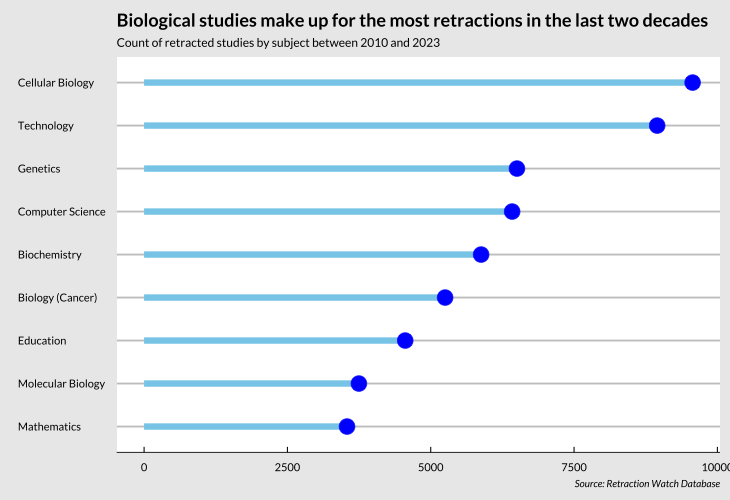

In [104]:
%%R -w 730 -h 500

top_10 <- df %>%
  arrange(desc(count)) %>%
  slice_head(n = 10) 

top_10_filtered <- top_10[-1, ]

ggplot(top_10_filtered) +
    geom_segment(aes(x = reorder(Subject, count), xend = reorder(Subject, count), y = 0, yend = count), color="skyblue", size=3) +  
    geom_point(aes(x = reorder(Subject, count), y = count), color="blue", size=7) + 
    coord_flip() + 
    scale_x_discrete(labels = subject_labels) +
    theme_economist_white() +
    labs(x='', y='',
         title='Biological studies make up for the most retractions in the last two decades',
         subtitle='Count of retracted studies by subject between 2010 and 2023',
        caption = 'Source: Retraction Watch Database') + 
    theme(
    text = element_text(family = "lato"),
    plot.title = element_text(size = 18, face = "bold", hjust = 0, margin = margin(b=10)),
    plot.subtitle = element_text(size = 12, hjust = 0, margin = margin(b=10)),
    plot.caption = element_text(size = 10, hjust = 1, face = "italic")
  )

In [34]:
df = pd.read_csv("retraction_watch.csv")
df


,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,URLS,ArticleType,RetractionDate,RetractionDOI,RetractionPubMedID,OriginalPaperDate,OriginalPaperDOI,OriginalPaperPubMedID,RetractionNature,Reason,Paywalled,Notes
0,61101,IL2RB Is a Prognostic Biomarker Associated wit...,(BLS) Biochemistry;(BLS) Genetics;(HSC) Medici...,"The Second People's Hospital of Wuhu, Departme...",Journal of Oncology,Hindawi,China,Guangyao Li;Yandong Wang;Ya Cheng,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,11/01/23 0:00,10.1155/2023/9807856,37946722.0,4/29/2022 0:00,10.1155/2022/2043880,35528245.0,Retraction,+Concerns/Issues About Data;+Concerns/Issues A...,No,NaN
1,61099,In Vitro Activity of Various Sulbactam Compoun...,(BLS) Microbiology;(HSC) Medicine - Pharmacology;,"State Key Laboratory of Respiratory Disease, T...",Computational and Mathematical Methods in Medi...,Hindawi,China,Shunian Xiao;Chuyue Zhuo;Chao Zhuo,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,11/01/23 0:00,10.1155/2023/9839734,37946955.0,11/25/2021 0:00,10.1155/2021/1175379,34868336.0,Retraction,+Concerns/Issues About Data;+Concerns/Issues A...,No,NaN
2,61098,IIBE: An Improved Identity-Based Encryption Al...,(B/T) Computer Science;(PHY) Engineering - Ele...,"Software Engineering Institute of Guangzhou, G...",Security and Communication Networks,Hindawi,China;Philippines,Chunhua Cao;Yana Tang;Deyan Huang;Weimin Gan;C...,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,11/01/23 0:00,10.1155/2023/9754210,0.0,9/20/2021 0:00,10.1155/2021/8527068,0.0,Retraction,+Concerns/Issues About Data;+Concerns/Issues A...,No,See also: https://pubpeer.com/publications/288...
3,61096,Identification of Diabetic Retinopathy through...,(B/T) Data Science;(B/T) Technology;(HSC) Medi...,"Faculty of Computer Science and Informatics, A...",Mobile Information Systems,Hindawi,Jordan;Saudi Arabia,Malik Bader Alazzam;Fawaz Alassery;Ahmed Almulihi,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,11/01/23 0:00,10.1155/2023/9832745,0.0,11/26/2021 0:00,10.1155/2021/1155116,0.0,Retraction,+Concerns/Issues About Data;+Concerns/Issues A...,No,NaN
4,61095,Identification of Characteristic Genes in Whol...,(BLS) Genetics;,"Department of Orthopaedics, Yuncheng Central H...",Computational and Mathematical Methods in Medi...,Hindawi,China,Xiaobo Ma;Junqiang Su;Bo Wang;Xiasheng Jin,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,11/01/23 0:00,10.1155/2023/9837497,37946971.0,1/13/2022 0:00,10.1155/2022/6609901,35069789.0,Retraction,+Concerns/Issues About Data;+Concerns/Issues A...,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60575,5,Effect of Perindopril on Large Artery Stiffnes...,(BLS) Biochemistry;(HSC) Medicine - Cardiology...,"Alfred and Baker Medical Unit, Baker Heart Res...",JAMA: Journal of the American Medical Association,American Medical Association,Australia,Anna A Ahimastos;Anuradha Aggarwal;Kellie M D'...,http://retractionwatch.com/2015/11/23/jama-ret...,Clinical Study;Research Article;,12/22/2015 0:00,10.1001/jama.2015.16678,26594834.0,10/03/07 0:00,10.1001/jama.298.13.1539,1791149.0,Retraction,+Falsification/Fabrication of Data;+Investigat...,No,NaN
60576,4,MtvR is a global small noncoding regulatory RN...,(BLS) Biology - Cellular;(BLS) Genetics;(BLS) ...,Institute for Biotechnology and Bioengineering...,Journal of Bacteriology,American Society for Microbiology,Portugal,Christian G Ramos;André M Grilo;Paulo J P da C...,http://retractionwatch.com/2014/11/03/post-doc...,Research Article;,11/01/14 0:00,10.1128/JB.02299-14,25319527.0,5/31/2013 0:00,10.1128/JB.00242-13,2372964.0,Retraction,+Duplication of Image;+Manipulation of Images;,No,exact date of retraction unknown
60577,3,"The second RNA chaperone, Hfq2, is also requir...",(BLS) Biology - Cellular;(BLS) Genetics;(BLS) ...,IBB—Institute for Biotechnology and Bioenginee...,Journal of Bacteriology,A

In [64]:
df['RetractionYear'] = df['RetractionDate'].str.extract(r'(\d{4})')
df = df.dropna(subset=['RetractionYear'])
df['RetractionYear'] = df['RetractionYear'].astype(int)
df

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,URLS,ArticleType,...,RetractionDOI,RetractionPubMedID,OriginalPaperDate,OriginalPaperDOI,OriginalPaperPubMedID,RetractionNature,Reason,Paywalled,Notes,RetractionYear
8,61082,Effectiveness of Ivermectin-Based Multidrug Th...,(HSC) Medicine - Infectious Disease;(HSC) Medi...,"ProgenaBiome, LLC, 1845 Knoll Dr., Ventura, CA...",Future Microbiology,Taylor and Francis,Australia;United States,Sabine Hazan;Sonya Dave;Anoja W Gunaratne;Siba...,https://retractionwatch.com/?s=sabine+hazan;ht...,Research Article;,...,10.2217/fmb-2022-0014c1,35695916.0,02/09/22 0:00,10.2217/fmb-2022-0014,35135310.0,Correction,+Error in Text;+Updated to Retraction;,No,NaN,2022
19,61056,Discovering Common Pathophysiological Processe...,(BLS) Anatomy/Physiology;(BLS) Genetics;(HSC) ...,"Department of Software Engineering, Daﬀodil In...",BioMed Research International,Hindawi,Australia;Bangladesh;Canada;India;Iraq;Saudi A...,Md Tanvir Hasan;Lway Faisal Abdulrazak;Mohamma...,https://retractionwatch.com/retracted-coronavi...,Research Article;,...,10.1155/2024/9789856,38550179.0,4/29/2022 0:00,10.1155/2022/8078259,35528173.0,Retraction,+Concerns/Issues About Data;+Concerns/Issues A...,No,NaN,2024
123,60927,Wireless Network Sensing of Urban Surface Wate...,(B/T) Computer Science;(B/T) Technology;(ENV) ...,School of Remote Sensing and Information Engin...,Wireless Communications and Mobile Computing,Hindawi,China,Qichao Zhao;Xiufeng Yang;Xuxin Dong;Huairui Li,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,...,10.1155/2023/9758314,0.0,12/06/21 0:00,10.1155/2021/2829195,0.0,Retraction,+Fake Peer Review;+Investigation by Journal/Pu...,No,NaN,2023
124,60926,Vibration Control of a Helicopter Rescue Simul...,(B/T) Technology;(B/T) Transportation;(PHY) En...,Naval Architecture and Ocean Engineering Colle...,Computational Intelligence and Neuroscience,Hindawi,China,Shengye Wang;Haitao Wang;Wei Xiong;Guangfeng Guan,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,...,10.1155/2023/9816384,38074369.0,4/25/2022 0:00,10.1155/2022/7173421,35510058.0,Retraction,+Fake Peer Review;+Investigation by Journal/Pu...,No,NaN,2023
125,60925,Vasoactive Drug Therapy and Clinical Nursing o...,(HSC) Medicine - Cardiovascular;(HSC) Medicine...,"Department of Cardiovascular Medicine, People’...",Contrast Media & Molecular Imaging,Hindawi,China,Menglin Li;Meixiang Xu;Minfang Feng;Lingyan Ren,https://retractionwatch.com/2022/09/28/exclusi...,Research Article;,...,10.1155/2023/9804951,38075712.0,9/21/2022 0:00,10.1155/2022/5659513,36213559.0,Retraction,+Fake Peer Review;+Investigation by Journal/Pu...,No,NaN,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60571,9,Sphingosine kinase 1 regulates pro-inflammator...,(BLS) Biochemistry;(BLS) Biology - Cellular;(B...,"Department of Physiology, Yong Loo Lin School ...",Journal of Cellular Physiology,Wiley,Singapore,Liang Zhi;Bernard P Leung;Alirio J Melendez,http://retractionwatch.com/2012/04/04/third-re...,Research Article;,...,10.1002/jcp.24007,22536599.0,3/30/2006 0:00,10.1002/jcp.20646,16575915.0,Retraction,+Duplication of Image;+Investigation by Compan...,No,NaN,2012
60572,8,Antimicrobial peptides (AMPs): peptide structu...,(BLS) Biochemistry;(BLS) Biology - Molecular;(...,"Researcher Center for Proteineous Materials, C...",Journal of Biochemistry and Molecular Biology,Biochemical Society of the Republic of Korea,South Korea,Yoonkyung Park;Kyung-Soo Hahm,NaN,Review Article;,...,unavailable,16355499.0,9/30/2005 0:00,10.5483/bmbrep.2005.38.5.507,16202228.0,Retraction,+Notice - Unable to Access via current resources;,No,NaN,2005
60575,5,Effect of Perindopril on Large Artery Stiffnes...,(BLS) Biochemistry;(HSC) Medicine - Cardiology...,"Alfred and Baker Medical Unit, Baker Heart Res...",JAMA: Journal of the American Medical Association,American Medical Association,Australia,Anna A Ahimastos;Anuradha Ag

### Didn't have time to make a chart about this but wanted to add a line in my story about prominent publishers that have high retractions.
### This is the analysis for that

In [68]:

publisher_df[publisher_df['Publisher'] == 'IEEE: Institute of Electrical and Electronics Engineers']


,RetractionYear,Publisher,Count
0,2010,IEEE: Institute of Electrical and Electronics ...,2390
47,2011,IEEE: Institute of Electrical and Electronics ...,3401
107,2012,IEEE: Institute of Electrical and Electronics ...,131
190,2013,IEEE: Institute of Electrical and Electronics ...,5
254,2014,IEEE: Institute of Electrical and Electronics ...,9
347,2015,IEEE: Institute of Electrical and Electronics ...,7
452,2016,IEEE: Institute of Electrical and Electronics ...,7
549,2017,IEEE: Institute of Electrical and Electronics ...,27
736,2018,IEEE: Institute of Electrical and Electronics ...,19
962,2019,IEEE: Institute of Electrical and Electronics ...,14


In [72]:
publisher_df[publisher_df['Publisher'] == 'Hindawi']


,RetractionYear,Publisher,Count
86,2011,Hindawi,1
118,2012,Hindawi,7
178,2013,Hindawi,13
247,2014,Hindawi,33
337,2015,Hindawi,22
436,2016,Hindawi,34
552,2017,Hindawi,19
742,2018,Hindawi,13
951,2019,Hindawi,28
1287,2020,Hindawi,44
